In [1]:
import numpy as np
import pandas as pd
import torch
import random
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sys
import os
#from umap.parametric_umap import ParametricUMAP
device = torch.device('cuda:2')
sys.path.append('../../')
from src.datasets.create_datasets import save_data

This notebook reads the datasets downloaded from google and preprocessed to have 1000 features in all the datasets and to have binary variables. The values of all the variables are 0 or 1. 
In addition, the data is divided into train, test, and validation.
If the dataset has train and test data, the data is joined and divided into train(80%)/test(10%)/validate(10%). If there is no test data, the train data is divided into train(80%)/test(10%)/validate(10%).
The datasets are saved in numpy format. Each dataset is saved in a .npz, and inside there is the train, test and validate data.
This notebook also plots the mean of the features of each dataset.

### Functions

In [2]:
def plot_mean_features(data): 
    """
    Plots the mean of the data
    """
    mean_features = torch.mean(data, dim=0)
    # Order frequency of features 
    mean_features_sort = torch.sort(mean_features,descending=True)
    print(data.shape[1])
    x_axis = torch.arange(0, data.shape[1])
    plt.figure
    plt.plot(x_axis,mean_features_sort.values, 'ro')
    plt.title('Mean features', fontsize = 12)
    plt.show()
    #name_file = hparams['save_name'] + '/Loss_real.png'
    #plt.savefig(name_file) # ,dpi=300
    plt.close()    

## Save all the datasets in a .npz


Links of some of the datasets:

QuickDraw10 (https://github.com/zaidalyafeai/QuickDraw10)

Fashion MNIST (https://www.kaggle.com/datasets/zalando-research/fashionmnist/code)

KDD Cup 1998 Data Data Set (https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data)

Heart (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

Adults data (https://data.world/uci/adult)

Data bank (https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)


In [2]:
# Define paths
# Defining paths
hparams = {
    'path_MNIST':['',''], 
    'path_fashion_MNIST':['fashion-mnist_train.csv','fashion-mnist_test.csv'], 
    'QuickDraw10':['train-ubyte.npz','test-ubyte.npz'],
    'path_humans': ['founders_ch22_1KSNP.npy'],
    'path_dogs': ['subset_allchr_337_samples_separated.npy'],
    'path_KDD': ['cup98LRN.txt'],
    'path_heart': ['heart_2020_cleaned.csv'],
    'path_adult':['uci-adult/data/adult_data.csv','uci-adult/data/adult_test.csv'],
    'path_bank': ['bank-additional-full.csv'],
    'output_folder': '../../results/datasets/datasets_sketch/',
    'sketch_size':100,
    'hidden_dim':2000,
    'n_dims':1000, 
    "type_lastlayer_sq":'Log-sum-exp',
    "type_lastlayer_rf":'Mean',
    "order_norm_sq":2,
    "order_norm_rf":2,   
    "activation":'relu', 
}
# Define class
class_read_data = save_data()


In [ ]:
# Save npz
data_MNIST = class_read_data.savedata(hparams['path_MNIST'],'MNIST','binarized',hparams['output_folder'])
data_fashion_MNIST = class_read_data.savedata(hparams['path_fashion_MNIST'],'fashion_MNIST','binarized',hparams['output_folder'])
data_humans = class_read_data.savedata(hparams['path_humans'],'humans','none',hparams['output_folder'])
data_dogs = class_read_data.savedata(hparams['path_dogs'],'dogs','none',hparams['output_folder'])
data_KDD = class_read_data.savedata(hparams['path_KDD'],'KDD','one_hot_encoding',hparams['output_folder'])
data_heart = class_read_data.savedata(hparams['path_heart'],'heart','one_hot_encoding',hparams['output_folder'])
data_QuickDraw10 = class_read_data.savedata(hparams['QuickDraw10'],'QuickDraw10','binarized',hparams['output_folder'])
data_adults = class_read_data.savedata(hparams['path_adult'],'adults','one_hot_encoding',hparams['output_folder'])
data_bank = class_read_data.savedata(hparams['path_bank'],'bank','one_hot_encoding',hparams['output_folder'])


dataset: fashion_MNIST, shape: (60000, 785)
dataset: fashion_MNIST, shape: (10000, 785)
dataset: humans, shape: (4144, 1000)
dataset: dogs, shape: (674, 198473)


../../src/datasets/create_datasets.py:201: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  data = self.read_dataset(path[0],name_data,binary_data_method)


dataset: KDD, shape: (95412, 481)
Number of features : torch.Size([211092]) (bigger than 1000). Taking the 1000 with more frequency
dataset: heart, shape: (319795, 18)
Number of features : torch.Size([3738]) (bigger than 1000). Taking the 1000 with more frequency
dataset: QuickDraw10, shape: torch.Size([80000, 784])
dataset: QuickDraw10, shape: torch.Size([20000, 784])
dataset: adults, shape: (32560, 15)
dataset: adults, shape: (16280, 15)


## Read datasets and plot the mean of the features

In [3]:
# Define names dataset
name_dataset = ['MNIST','fashion_MNIST','humans','dogs','KDD','heart','QuickDraw10','adults','bank']

# Read data
data_MNIST = np.load(hparams['output_folder'] + name_dataset[0]+'.npz')
data_fashion_MNIST = np.load(hparams['output_folder'] + name_dataset[1]+'.npz')
data_humans = np.load(hparams['output_folder'] + name_dataset[2]+'.npz')
data_dogs = np.load(hparams['output_folder'] + name_dataset[3]+'.npz')
data_KDD = np.load(hparams['output_folder'] + name_dataset[4]+'.npz')
data_heart = np.load(hparams['output_folder'] + name_dataset[5]+'.npz')
data_QuickDraw10 = np.load(hparams['output_folder'] + name_dataset[6]+'.npz')
data_adults = np.load(hparams['output_folder'] + name_dataset[7]+'.npz')
data_bank = np.load(hparams['output_folder'] + name_dataset[8]+'.npz')

data_train = [data_MNIST['train'],data_fashion_MNIST['train'],data_humans['train'],
        data_dogs['train'],data_KDD['train'],data_heart['train'],data_QuickDraw10['train'],
        data_adults['train'],data_bank['train']]

data_val = [data_MNIST['val'],data_fashion_MNIST['val'],data_humans['val'],
        data_dogs['val'],data_KDD['val'],data_heart['val'],data_QuickDraw10['val'],
        data_adults['val'],data_bank['val']]

data_test = [data_MNIST['test'],data_fashion_MNIST['test'],data_humans['test'],
        data_dogs['test'],data_KDD['test'],data_heart['test'],data_QuickDraw10['test'],
        data_adults['test'],data_bank['test']]

## Plot Mean of the features of the datasets

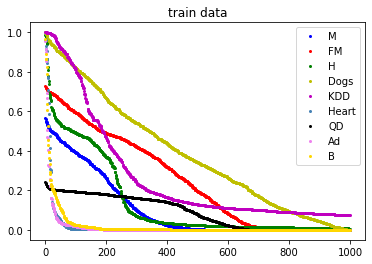

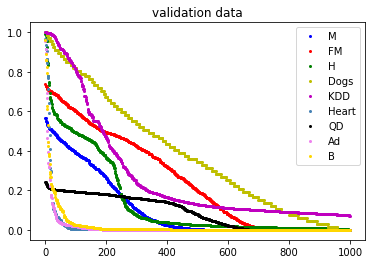

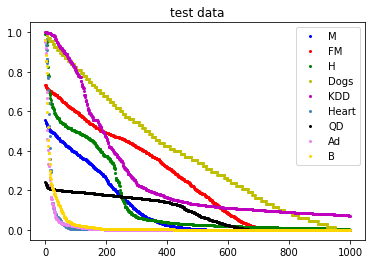

In [4]:
dataset = [data_train,data_val,data_test]
dataset_names = ['train', 'validation', 'test']
for k in range(3):
    data = dataset[k]
    colors  = ['b','r','g','y','m','steelblue','k','violet','gold']
    #names = ['MNIST','fashion_MNIST','SNP_humans','SNPS_dogs','KDD','heart','data_QuickDraw10','data_adults','data_banks']
    names = ['M','FM','H','Dogs','KDD','Heart','QD','Ad','B']
    for i in range(len(data)):
        dat = torch.from_numpy(data[i]).float()
        mean_features = torch.mean(dat, dim=0)
        mean_features_sort = torch.sort(mean_features,descending=True)
        x_axis = torch.arange(0, dat.shape[1])
        plt.plot(x_axis,mean_features_sort.values, "o", color = colors[i],markersize=2,label=names[i])
    plt.legend()
    if k == 0:
        # Save plot if train data
        plt.savefig('../../results/plots_datasets/Mean_datasets_traindata', bbox_inches='tight')
    plt.title('{} data'.format(dataset_names[k]))
    plt.show()
    plt.close()


### Genetics dataset

#### Human dataset

1000


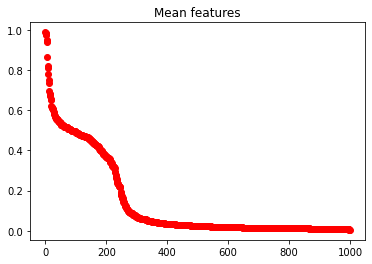

In [8]:
plot_mean_features(torch.from_numpy(data_humans['train']))

torch.Size([3315, 1000])


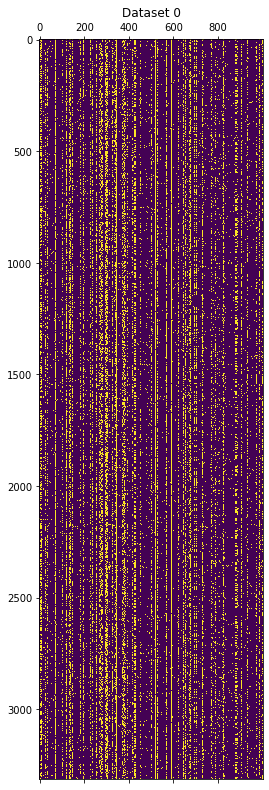

In [9]:
dataloader_train = torch.utils.data.DataLoader(data_humans['train'], batch_size= 3366, shuffle=True)
for i, data in enumerate(dataloader_train, 0):
    print(data.shape)
    plt.matshow(data.cpu().detach().numpy())
    plt.title('Dataset {}'.format(i))
    plt.show()

#### Dogs datasets

1000


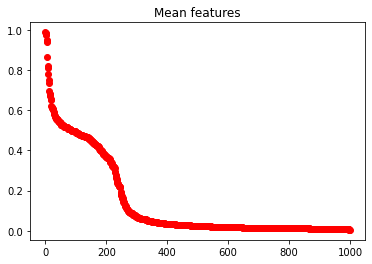

In [12]:
plot_mean_features(torch.from_numpy(data_humans['train']).float())

### Image datasets 

#### MNIST

tensor([0., 1.])
784


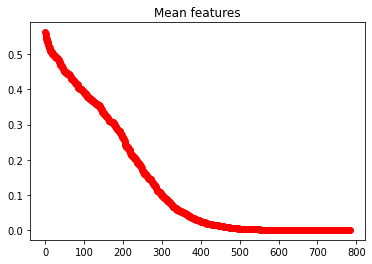

0.1322583109140396
tensor([0., 1.])
784


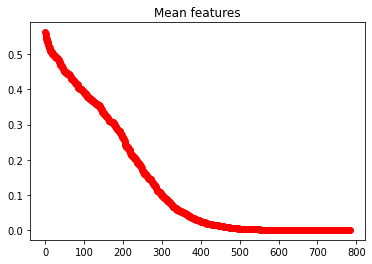

In [29]:
transform = transforms.Compose([transforms.ToTensor(),
                              #transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('../../src/datasets/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)
binarized = True
# Binarize dataset with a 0.5 threshold or median value
for i, data in enumerate(trainloader, 0):
    for i in range(2):
        inputs, labels = data
        if binarized:
            inputs[inputs < 0.5]= 0
            inputs[inputs >= 0.5]= 1
            binarized = False
        else:
            mean = torch.mean(dat).item()
            print(mean)
            inputs[inputs < mean]= 0
            inputs[inputs >= mean]= 1        
        print(inputs.unique()) 
        dat = inputs.flatten(start_dim=1)
        plot_mean_features(dat)

torch.Size([1000, 784])


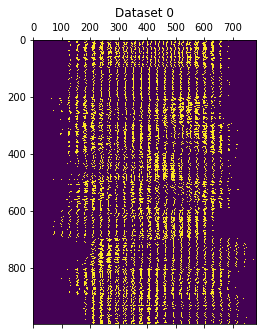

In [16]:
transform = transforms.Compose([transforms.ToTensor(),
                              #transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('../../src/datasets/',download=True, train=True, transform=transform)

# Select randomly 100 samples of each class to reduce the dimencion of the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)  
for i, data in enumerate(trainloader, 0):
    inputs, labels = data    
    inputs[inputs < 0.5]= 0
    inputs[inputs >= 0.5]= 1

# Select 100 samples of each label (10 digits)
x = []
for label_number in range(10):
    data = inputs[labels==label_number,...]
    # Select 100 samples
    idx = torch.randint(high=len(data), size=(100,))
    x.append(data[idx]) 

x = torch.cat(x)
dat = x.flatten(start_dim=1)
print(dat.shape)
plt.matshow(dat.cpu().detach().numpy())
plt.title('Dataset {}'.format(i))
plt.show()

torch.Size([1000, 784])


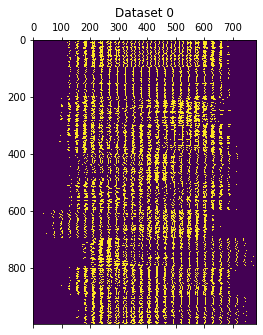

In [18]:
# Select randomly 100 samples of each class to reduce the dimencion of the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)  
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    mean = torch.mean(dat).item()
    inputs[inputs < mean]= 0
    inputs[inputs >= mean]= 1
    
# Select 100 samples of each label (10 digits)
x = []
for label_number in range(10):
    data = inputs[labels==label_number,...]
    # Select 100 samples
    idx = torch.randint(high=len(data), size=(100,))
    x.append(data[idx]) 

x = torch.cat(x)
dat = x.flatten(start_dim=1)
print(dat.shape)
plt.matshow(dat.cpu().detach().numpy())
plt.title('Dataset {}'.format(i))
plt.show()

#### QuickDraw10 (https://github.com/zaidalyafeai/QuickDraw10)

1000


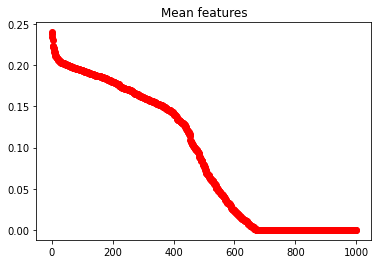

In [21]:
# Read data
train_data = np.load('train-ubyte.npz')
x_train, y_train = train_data['a'], train_data['b']
# Conver to tensor
x = torch.from_numpy(1-x_train).flatten(1)  

# Scale data
scaler = MinMaxScaler()
data = scaler.fit_transform(x)
data[data < 0.5]= 0
data[data >= 0.5]= 1 

dat = torch.from_numpy(data)
plot_mean_features(torch.from_numpy(data_QuickDraw10['train']))

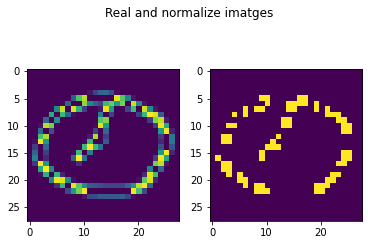

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Real and normalize imatges')

#for i, item in enumerate(image):
# Reshape the array for plotting
item_real = dat.reshape(-1, 28, 28)
ax1.imshow(1-x_train[3]) #.cpu()
ax2.imshow(item_real[3]) #.cpu()

#### Fashion MNIST (https://www.kaggle.com/datasets/zalando-research/fashionmnist/code)

1000


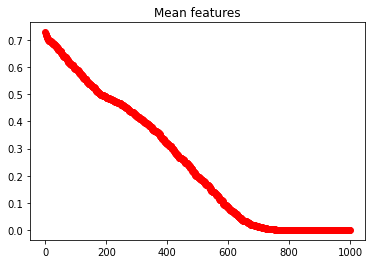

In [25]:
plot_mean_features(torch.from_numpy(data_fashion_MNIST['train']))

### UCI dataset

#### KDD Cup 1998 Data Data Set (https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data)

1000


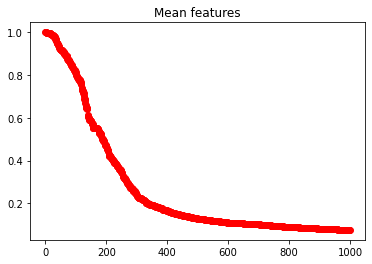

In [26]:
plot_mean_features(torch.from_numpy(data_KDD['train']))

#### Adults data (https://data.world/uci/adult)

1000


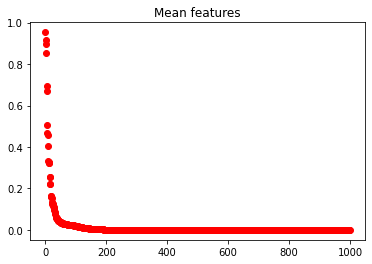

In [27]:
plot_mean_features(torch.from_numpy(data_adults['train']))

### Kaggle dataset

#### Heart: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [28]:
data=pd.read_csv('heart_2020_cleaned.csv',sep=",")

In [29]:
#### Convert data to one-hot-encoding
enc = sklearn.preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(data)

# 3. Transform
onehotlabels = enc.transform(data).toarray()                   
onehotlabels.shape

# Convert numpy to tensor
data = torch.from_numpy(onehotlabels)

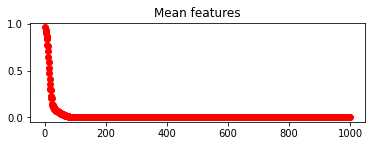

In [30]:
# Order features
mean_features = torch.mean(data, dim=0)
mean_features_sort = torch.sort(mean_features,descending=True)
x_axis = torch.arange(0,data.shape[1])
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(x_axis[1:1000],mean_features_sort.values[1:1000], 'ro')
plt.title('Mean features', fontsize = 12)
plt.show()
plt.close()

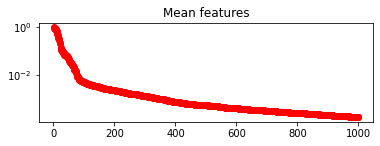

In [31]:
# Order features
mean_features = torch.mean(data, dim=0)
mean_features_sort = torch.sort(mean_features,descending=True)
x_axis = torch.arange(0,data.shape[1])
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(x_axis[1:1000],mean_features_sort.values[1:1000], 'ro')
# Log scale
ax.set_yscale('log')
plt.title('Mean features', fontsize = 12)
plt.show()
plt.close()

#### Data bank (https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)

1000


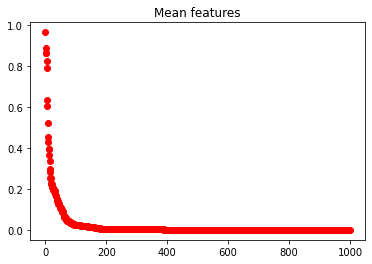

In [32]:
plot_mean_features(torch.from_numpy(data_bank['train']))